#  **Constructing Classical Gates with Quantum Gates**

#### Classical logic gates, such as AND, OR, and NOT gates, can be constructed using quantum gates.

#### Importing the necessary libraries:

In [10]:
import qiskit
import numpy as np
from qiskit_aer import Aer
from qiskit import  QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram # 2D Histogram
from math import pi, sqrt # pi = 3.14 and square root operation

## 1. $NOT$ Gate
#### A classical $NOT$ gate inverts the input: if the input is 0, $NOT$ gate outputs 1, and if the input is 1, it gives 0. This reminds us the $X$ gate in quantum where is used to flip the state of a qubit.

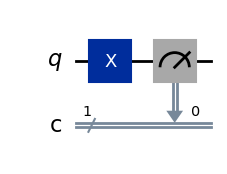

In [3]:
qc_not = QuantumCircuit(1,1, name = 'qc')

qc_not.x(0)
qc_not.measure(0,0)
qc_not.draw('mpl')


Total counts are: {'1': 1000}


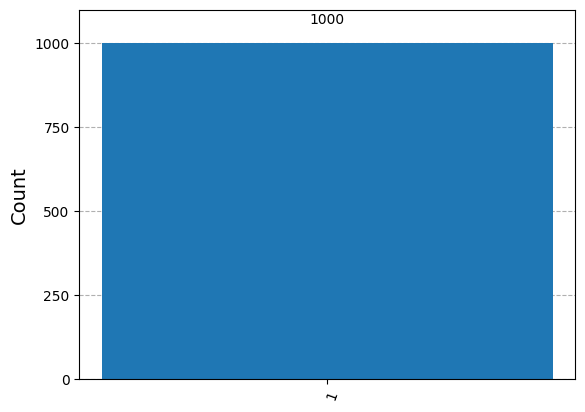

In [7]:
# initiate
estimator = Aer.get_backend("qasm_simulator")

# run
job = estimator.run(qc_not, shots =1000)

# results
counts = job.result().get_counts(qc_not)

print("\nTotal counts are:" , counts)

plot_histogram(counts)

## 2. $AND$ Gate
#### A classical $AND$ gate results 1 only if both inputs are 1, otherwise, it gives 0. To simulate the classical $AND$ gate using quantum gates, we can use the $CCNOT$ (Toffoli) gate. The $CCNOT$ gate has three qubits: two control qubits and one target qubit. It flips the target qubit if both control qubits are $\ket 1$.

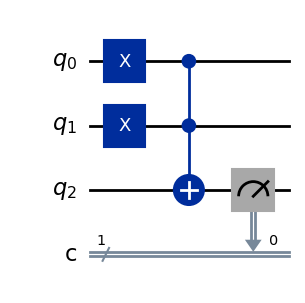

In [58]:
# creating |011> as the initial state, where CCNOT gate retuns it as |111> 

qc_and = QuantumCircuit(3,1,name = 'qc')

qc_and.x(0)
qc_and.x(1)

qc_and.ccx(0,1,2)

qc_and.measure(2,0) # measurement is done only the 3rd qubit(output) on the classical bit that we have entered

qc_and.draw('mpl')


Total counts are: {'1': 1000}


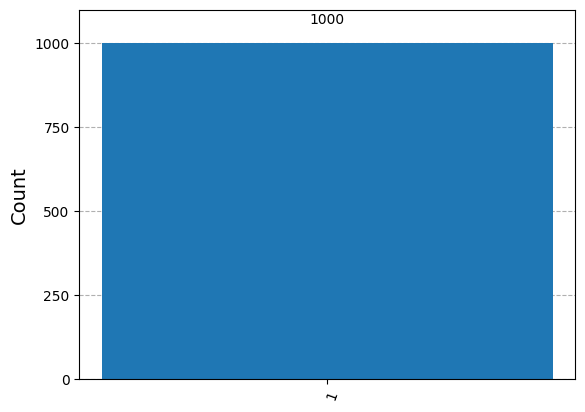

In [59]:
estimator = Aer.get_backend("qasm_simulator")

# run
job = estimator.run(qc_and, shots =1000)

# results
counts = job.result().get_counts(qc_and)

print("\nTotal counts are:" , counts)

plot_histogram(counts)

## 3. $OR$ Gate
#### A classical $OR$ gate results 1 if at least one of inputs is 1, and 0 only if both inputs are 0. An $OR$ gate can be constructed using a combination of two $CNOT$ and one $CCNOT$ quantum gates.

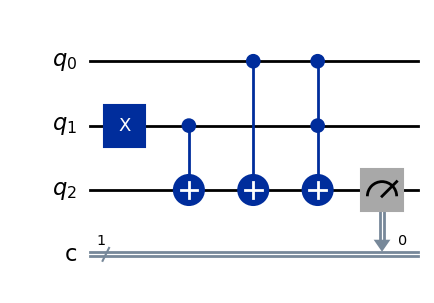

In [50]:
qc_or = QuantumCircuit(3,1, name = 'qc')

# # creating |010> as the initial state, where OR gate retuns it as |110> 
#qc_or.x(0)
qc_or.x(1)

qc_or.cx(1,2)
qc_or.cx(0,2)
qc_or.ccx(0,1,2)

qc_or.measure(2,0)

qc_or.draw('mpl')


Total counts are: {'1': 1000}


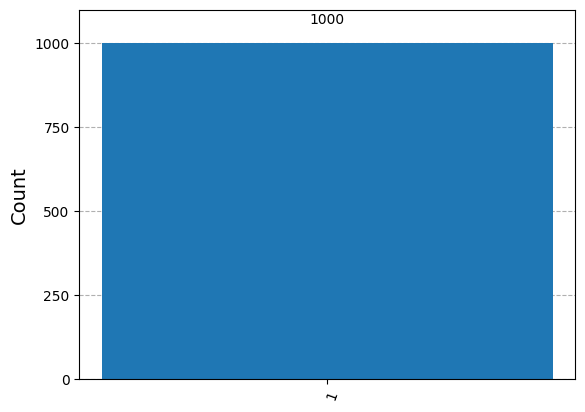

In [51]:
estimator = Aer.get_backend("qasm_simulator")

# run
job = estimator.run(qc_or, shots =1000)

# results
counts = job.result().get_counts(qc_or)

print("\nTotal counts are:" , counts)

plot_histogram(counts)

## 4. $XOR$ Gate
#### An $XOR$ gate (exclusive OR gate) is a type of classical logic gate that results 1 if and only if one of the bits is 1 and the other bit is 0. An $XOR$ gate can be constructed using two $CNOT$ where each time the 3rd qubit is considered as the target.

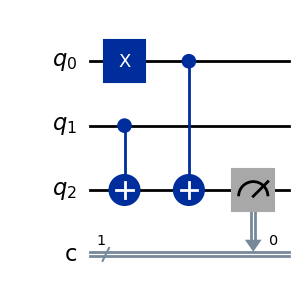

In [52]:
qc_xor = QuantumCircuit(3,1,name= 'qc')

# Create |001> as the initial state and applying CNOT gates to it returns |101>.
qc_xor.x(0)

qc_xor.cx(1,2)
qc_xor.cx(0,2)

qc_xor.measure(2,0)

qc_xor.draw('mpl')




Total counts are: {'1': 1000}


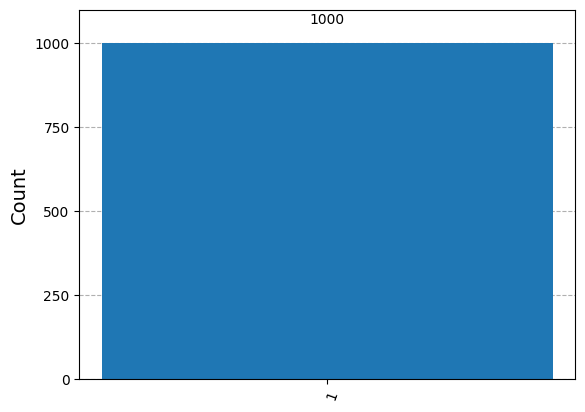

In [53]:
estimator = Aer.get_backend("qasm_simulator")

# run
job = estimator.run(qc_xor, shots =1000)

# results
counts = job.result().get_counts(qc_xor)

print("\nTotal counts are:" , counts)

plot_histogram(counts)

## 5. $NAND$ Gate
#### A $NAND$ gate (short for "NOT AND") combines the operations of an $AND4 gate and a $NOT$ gate so that a $NAND$ gate output is the inverse of the $AND$ gate’s output.

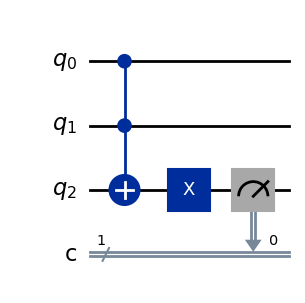

In [60]:
qc_nand = QuantumCircuit(3,1, name = 'qc')

# starting from the initial state |000> and producing |100> after passing NAND gate
qc_nand.ccx(0,1,2)
qc_nand.x(2)

qc_nand.measure(2,0)

qc_nand.draw('mpl')


Total counts are: {'1': 1000}


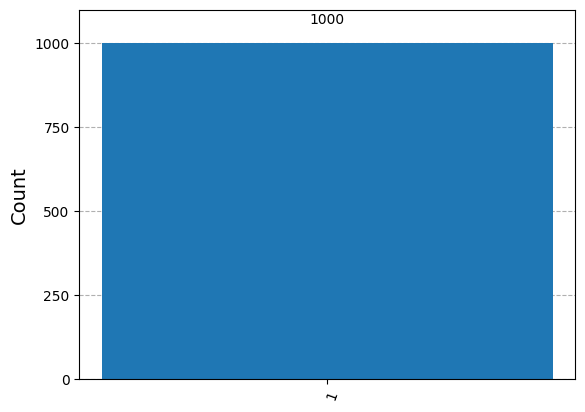

In [61]:
estimator = Aer.get_backend("qasm_simulator")

# run
job = estimator.run(qc_nand, shots =1000)

# results
counts = job.result().get_counts(qc_nand)

print("\nTotal counts are:" , counts)

plot_histogram(counts)

## 6. Half Adder Circuit
#### Half adder gate shows the result of adding the two binary digits as two outputs called **"sum"** and **"carry"** where the sum is equivalent to the $XOR$ gate and the carry is mapped to $AND$ gate. 

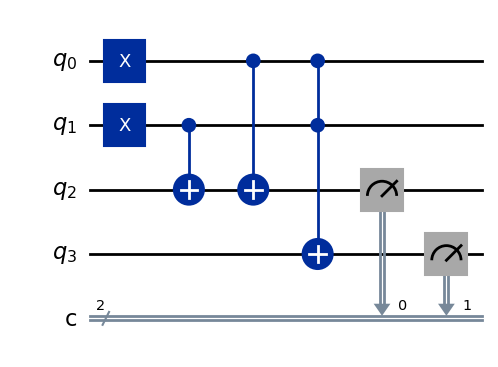

In [62]:
qc_ha =QuantumCircuit(4,2, name = 'qc')

# The state of 4 qubits is initialized by |0011> and by performing half adder gate we reach to |1011>.  
qc_ha.x(0)
qc_ha.x(1)

# XOR
qc_ha.cx(1,2)
qc_ha.cx(0,2)

#AND
qc_ha.ccx(0,1,3)

#sum
qc_ha.measure(2,0)

# carry
qc_ha.measure(3,1)

qc_ha.draw('mpl')


Total countsare: {'10': 1000}


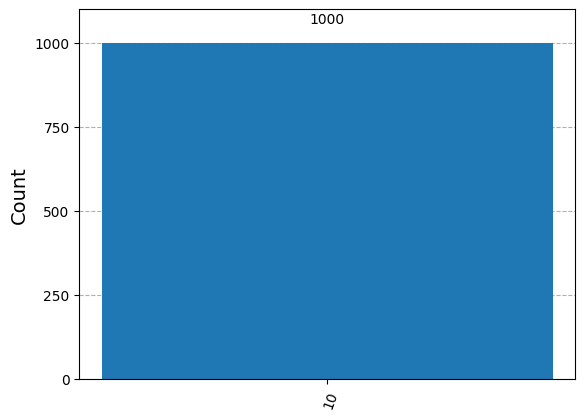

In [67]:
estimator = Aer.get_backend('qasm_simulator')

#run
job = estimator.run(qc_ha, shots = 1000)

# result
counts = job.result().get_counts(qc_ha)

print('\nTotal countsare:' , counts)

plot_histogram(counts)